# **PROJECT #2: TITANIC - WHO WILL SURVIVE?**

## **EXPLORATORY DATA ANALYSIS**

In [40]:
# importing required libraries for data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# importing libraries needed for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing libraries for regression and machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**LOAD TRAIN AND TEST FILES FROM TITANIC.ZIP**

In this section, I have acquired the train and test files from the titanic.zip folder. Once I have the individual datasets and have them converted into a Pandas Dataframe, I combine the two datasets to run operations on the both of them together.

I am printing out the different columns available in the train dataset. This will help to manipulate and analyze the dataset.

In [41]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


To see how the data of the train dataset has been organized, I call the head function on the same. Using this property, I preview the first three rows of the dataset. I do the same for the test dataset.

In [42]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [43]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [44]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


**ANALYZING THE DATASET**

Before moving on, it is useful to find out the different data types for the various features. 

In the train dataset:
- 7 features or columns are int or float
- 5 features or columns are string objects

In the test dataset:
- 6 features or columns are int or float
- 5 features or columns are string objects

In [45]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

Next, I analyze the numerical features in the train dataset, that is, a total of seven features. 

- The train dataset has a total sample of 891.
- Survived feature has values of either 0 or 1.
- Around 38 % of samples survived representative of the actual survival rate at 32%.
- Several passengers (> 75%) travelled without their parents or children.
- Almost 30% of the passengers had spouses and/or siblings aboard.
- Few passengers (<1%) paid as high as a fare of $512.
- Few elderly passengers (<1%) within the age range of 65-80.

In the code cell below, I have reviewed the survival rate and parch distribution using percentile.

In [46]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


After analysing the numerical features, I now analyze the non-numerical features.
- Names are unique (count=unique=891)
- There are two possible sex variables with 65% male (top=male, freq=577/count=891).
- There are many duplicates in Cabin values. Or several passengers shared a cabin.
- Embarked has three possible values with S port used by most (top=S)
- Ticket feature has high many duplicate values (ratio=22%)(unique=681).

In [47]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**RELATIONSHIP BETWEEN PCLASS AND OTHER FEATURES**

In the following few code cells, I am looking for any relationship between the socioeconomic status of the passenger and other features, such as age, gender, and number of family members on board.

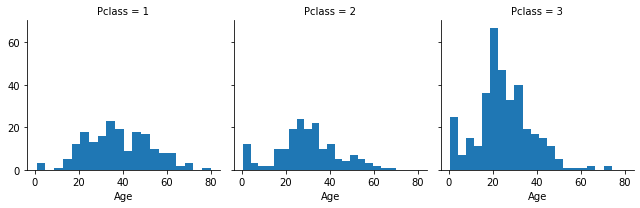

In [48]:
plot = sns.FacetGrid(train, col='Pclass')
plot.map(plt.hist, 'Age', bins=20)

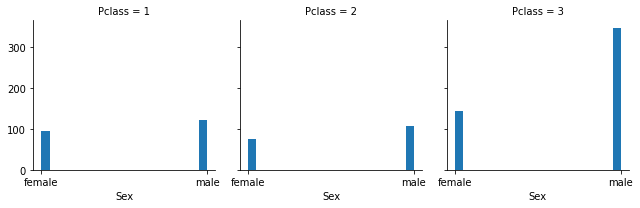

In [49]:
plot = sns.FacetGrid(train, col='Pclass')
plot.map(plt.hist, 'Sex', bins=20)

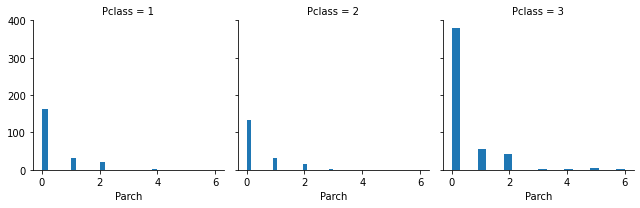

In [50]:
plot = sns.FacetGrid(train, col='Pclass')
plot.map(plt.hist, 'Parch', bins=20)

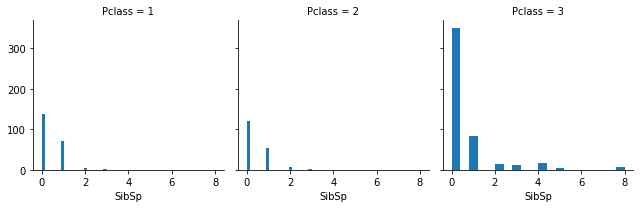

In [51]:
plot = sns.FacetGrid(train, col='Pclass')
plot.map(plt.hist, 'SibSp', bins=20)

The common relationship between all the above plots is that, there is not much difference in relation between the Pclass=1 and Pclass=2 graphs for the corresponding feature, however a significant difference is observed in Pclass=3.

In the age correlation plots, I can see that among those passengers with ticket class 3, most are between 20-40 years old.

In the gender correlation plots, approximately twice the female Pclass 3 passengers are male.

Very few of the Pclass 3 passengers are travelling with their family members, and among Pclass 2 and 1, almost no passenger is travelling with their family members.

**RELATIONSHIP BETWEEN DISTRIBUTION OF SURVIVAL VICTIMS AD OTHER FEATURES**

In the following few code cells, I am looking for any relationship between the distribution of survival victims and other features, such as age, gender, and socioeconomic class.

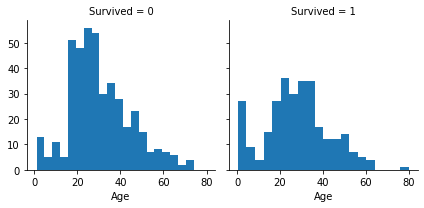

In [52]:
plot = sns.FacetGrid(train, col='Survived')
plot.map(plt.hist, 'Age', bins=20)

From the above graphs, I come to the conclusion that:
- Among passengers between 15-30, a lot didn't survive. 
- The oldest person survived (age=80)
- Infants and toddlers, age range 1-5, have a high survival rate.
  
Therefore, while rescuing and evacuating, the elderly and infants ones were given priority over the young adults.

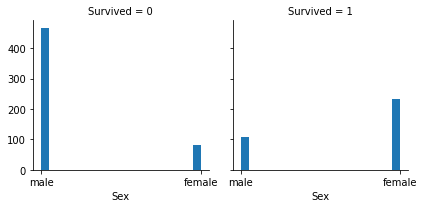

In [53]:
plot = sns.FacetGrid(train, col='Survived')
plot.map(plt.hist, 'Sex', bins=20)

From the above graphs, I come to the conclusion that:

- Most males aboard did not survive.
- Among the number of passengers who did survive, more than two-thirds were female.

Therefore, while rescuing and evacuating, female passengers were given priority over males.

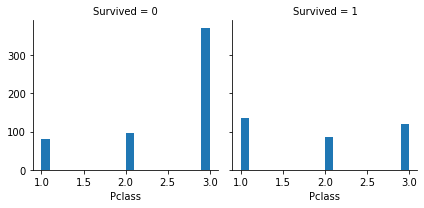

In [54]:
plot = sns.FacetGrid(train, col='Survived')
plot.map(plt.hist, 'Pclass', bins=20)

From the above graphs, I come to the conclusion that:

- More than 75% of passengers with Pclass 3 tickets did not survive.
- Among the number of passengers with Pclass 1 and Pclass 2 tickets, about half managed to survive.

Therefore, while rescuing and evacuating those with a higher socioeconomic status, that is, Pclass 1 and Pclass 2 tickets were given priority.

**CORRELATION ANALYSIS ON THE MOST IMPORTANT FEATURES**

Among the features in the train dataset, the least important ones seem to be PassengerID, Name, and Cabin. 

I have performed a Pearson Correlation analysis on the features besides the above mentioned features of the train dataset and plot the corresponding heat map below.

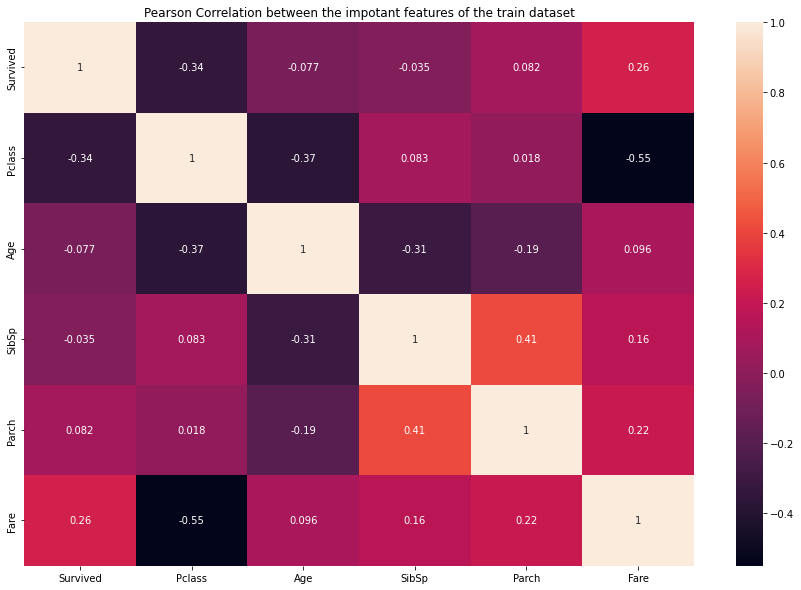

In [55]:
temp = train.drop(['PassengerId', 'Name', 'Cabin'], axis=1)
correlation = temp.corr(method='pearson')
plt.figure(figsize=(15, 10))
plt.title('Pearson Correlation between the impotant features of the train dataset')
sns.heatmap(correlation, annot=True)
plt.show()

From the above heat map, I come to the conclusion that:

- The highest correlation is between Parch and SibSp meaning that almost half of the passengers travelling with their parents and children were also travelling with their siblings and spouses.
- The survival of a passenger had some correlation to the ticket fare that passenger paid.
- The ticket fare is correlated to the number of family members travelling with the passenger.

**EXTRACT INFORMATION FROM THE NON-NUMERICAL FEATURES**

The non-numerical features in the train dataset include Name, Sex, Ticket, Cabin, and Embarked.

/opt/python/envs/default/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/python/envs/default/lib/python3.8/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


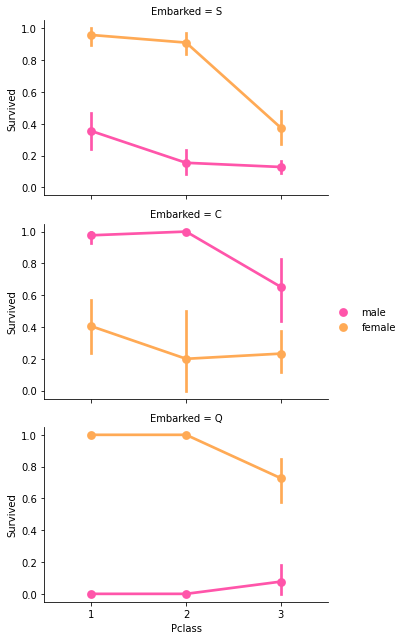

In [56]:
plot = sns.FacetGrid(train, row='Embarked', height=3, aspect=1.6)
plot.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',
         palette='spring')
plot.add_legend()

From the above correlations, I come to the conclusion that:

- Female passengers had a much higher survival rate compared to male passengers.
- Exception: In the case where the boat embarked at C(Cherbourg), the survival rate of male passengers was higher than that of female. This is probably because of a correlation between Pclass, Embarked, and corresponding survival chance. It does not seem to be a direct correlation between Embarked and Survival chance.
- In Pclass 3, males had a better survival chance when compared to Pclass 2 for the C(Cherbourg) and Q(Queensland) port of embarkation.
- In Pclass 3, ports of embarkation have varying survival chances.

**WRANGLE DATA**

In this section, I aim to correct the dataset by dropping some features and thereby dealing with fewer data points in the dataset. This eases up analysis. It might be better to start with columns that contain irrelevant or missing data.

Here I am dropping the Ticket and Cabin columns. It is better to perform operations on both the train and test set to remain consistent.

In [57]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# noinspection PyRedeclaration
combine = [train, test]

print("Before", train.shape, test.shape, combine[0].shape, combine[1].shape)

train = train.drop(["Ticket", "Cabin"], axis=1)
test = test.drop(["Ticket", "Cabin"], axis=1)
combine = [train, test]

"After", train.shape, test.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

**CREATING A TITLE FEATURE TO CATEGORISE THE DATA FURTHER**

I have extracted the title of the passenger using regex expressions. The pattern (\w+\.) will match the first word in the Name column that ends with a dot


In [58]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We could further classify the titles listed above as rare or common. We could also convert the categorical features into ordinal.

In [59]:
for dataset in combine:
    dataset["Title"] = dataset["Title"].replace(
    ["Lady", "Countess", "Capt", "Col", "Don", "Dr", 
    "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")

    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")
    
train[["Title", "Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [60]:
title_map = {"Mr": 1, "Miss": 2, "Mrs": 3, 
                 "Master": 4, "Rare": 5}
for dataset in combine:
    dataset["Title"] = dataset["Title"].map(title_map)
    dataset["Title"] = dataset["Title"].fillna(0)

train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2


Now that we have a Title feature that is numerical, we can get rid of the Name feature. I am also dropping the PassengerID column since it is irrelevant in our analysis.

In [61]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 9), (418, 9))

**CONVERT CATEGORICAL TO NUMERICAL**

Numerical features are easier to analyse. Hence, in this section I will be converting the Sex feature to numerical, where female = 1 and male = 0.

In [62]:
for dataset in combine:
    dataset["Sex"] = dataset["Sex"].map( {"female": 1, 
    "male": 0} ).astype(int)

train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2


**CREATING AGE GROUP FEATURE**

Here I am classifying the different passengers into certain age groups, similar to the title feature created above.

I have first rounded off the ages to avoid confusion with decimals and have then moved forward to making the age groups ordinal.

In [63]:
guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2


In [64]:
train["AgeGroup"] = pd.cut(train["Age"], 5)
train[["AgeGroup", "Survived"]].groupby(["AgeGroup"], as_index=False).mean().sort_values(by="AgeGroup", ascending=True)

,AgeGroup,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [65]:
for dataset in combine:    
    dataset.loc[ dataset["Age"] <= 16, "Age"] = 0
    dataset.loc[(dataset["Age"] > 16) & (dataset["Age"] <= 32), 'Age'] = 1
    dataset.loc[(dataset["Age"] > 32) & (dataset["Age"] <= 48), 'Age'] = 2
    dataset.loc[(dataset["Age"] > 48) & (dataset["Age"] <= 64), 'Age'] = 3
    dataset.loc[ dataset["Age"] > 64, "Age"] = 4

train = train.drop(["AgeGroup"], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


Since we are done classifying the Age groups, I have now dropeed the AgGroup feature in the dataset.

**MERGING EXISTING FEATURES**

In this section, I will be merging the SibSp and the Parch features to account for a single feature Family which would show the number of family members travelling. I later dropped the Parch and SibSp features since they are no longer of any use.

In [66]:
for dataset in combine:
    dataset["Family"] = dataset["SibSp"] + dataset["Parch"] + 1

train[["Family", "Survived"]].groupby(["Family"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Since we look for individual survivals, we can change the Family feature to simply indicate whether the passenger is alone or not. 

For this, I have created another feature called isAlone. Now we can safely drop all three columns—SibSp, Parch, and Family.

In [67]:
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["Family"] == 1, "IsAlone"] = 1

train[["IsAlone", 'Survived']].groupby(["IsAlone"], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [68]:
train = train.drop(["Parch", "SibSp", "Family"], axis=1)
test = test.drop(["Parch", "SibSp", "Family"], axis=1)
combine = [train, test]
train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1


**CONVERTING EMBARKED TO NUMERIC**

In this section, I am converting the categorical feature Embarked, to numeric. 

Before doing so, since the embarked feature has some empty rows, I will be completing that first. I will be filling these empty spaces with te most frequent port used to embark by the passengers.

In [69]:
com_port = train.Embarked.dropna().mode()[0]
com_port

'S'

In [70]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(com_port)
    
train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [71]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S": 0, "C": 1, "Q": 2}).astype(int)
train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1


**COMPLETE AND CATEGORIZE FARE**

In this section, I am filling any empty rows in the Fare column with the fare value that is most common.

Once the empty spaces have been filled, I have grouped the fare amounts.

In [72]:
test["Fare"].fillna(test["Fare"].dropna().median(), inplace=True)
train["FareGroup"] = pd.qcut(train["Fare"], 4)
train[["FareGroup", "Survived"]].groupby(["FareGroup"], as_index=False).mean().sort_values(by="FareGroup", ascending=True)

,FareGroup,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Since we do not the actual fare value, I have simply converted the Fare feature according to the FareGroup calculated.

In [73]:
for dataset in combine:
    dataset.loc[ dataset["Fare"] <= 7.91, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 7.91) & (dataset["Fare"] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset["Fare"] > 14.454) & (dataset["Fare"] <= 31), 'Fare']   = 2
    dataset.loc[ dataset["Fare"] > 31, "Fare"] = 3
    dataset['Fare'] = dataset["Fare"].astype(int)

train = train.drop(["FareGroup"], axis=1)
combine = [train, test]
train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1


## **MODELLING AND QUESTION ANSWERING**

In [74]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

**LOGISTIC REGRESSION MODEL**

Logistic Regression is an appropriate model to use since we are still early in the workflow. It is useful since it will help me to measure the relationship between the categorical feature and the other features by estimating probabilities using a logistic function. This is the cumulative logistic distribution.

In [75]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, Y_train) * 100, 2)
acc_log

81.37

In [76]:
coeff = pd.DataFrame(train.columns.delete(0))
coeff.columns = ["Feature"]
coeff["Correlation"] = pd.Series(log_reg.coef_[0])
coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.193429
5,Title,0.408985
4,Embarked,0.282289
6,IsAlone,0.185954
3,Fare,-0.065545
2,Age,-0.564966
0,Pclass,-1.262582


In the section above, you see the coefficients of every feature calculated in the decision function.

Positive coefficients indicate a higher probability and negative coefficients decrease the probability. From this I come to the conclusions:
- Sex: This feature has the highest probability. This implies that as the value increases (male=0 and female=1), the probability of Survived=1 increases as well. 
- Pclass: This feature as the lowest probability. As the Pclass value increases (Pclass=1, Pclass=2, and Pclass=3), the probability of Survived=1 decreases. So, the lower he Pclass value, higher the survival chances.

**K-NEAREST NEIGHBOURS MODEL**

The k-NN algorithm is a non-parametric method used to classify and for regression. In this method, a sample is classified by majority vote of its neighbours and the sample is assigned to the class most common among its k nearest neighbours. 

The confidence score of KNN is better than Logistic Regression.

In [77]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
# noinspection PyRedeclaration
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.29

**DECISION TREE**

In the Decision tree model, features (tree branches) are mapped to the conclusions about the target values (tree leaves). 

The model confidence score for Decision Tree is the highest.

In [78]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
# noinspection PyRedeclaration
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64